# Bilbiotecas

---

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder

# Constantes

---

In [18]:
DATAPATH = 'data/1_telecom_customer_churn.csv'
SEED = 42

---

In [19]:
data = pd.read_csv(DATAPATH)

In [20]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6386,6656-GULJQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),83.55,6093.3,No
5157,5840-NVDCG,Female,0,Yes,Yes,16,Yes,No,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Bank transfer (automatic),68.25,1114.85,No
3069,1784-BXEFA,Female,0,No,No,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.55,187.35,No
4867,0899-LIIBW,Male,0,Yes,No,34,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,100.85,3527.3,No
1045,3524-WQDSG,Female,0,Yes,Yes,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),99.30,4209.95,No


In [24]:
print(f"nº de clientes {data.shape[0]}")
print(f"nº de features {data.shape[1]-2}, não foi considerado a coluna Church  pois é a variavel target e a variavel CustomerID poi sé um identificador")

nº de clientes 7043
nº de features 19, não foi considerado a coluna Church  pois é a variavel target e a variavel CustomerID poi sé um identificador


In [22]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
target_counts = data['Churn'].value_counts()
target_counts

Churn
No     5174
Yes    1869
Name: count, dtype: int64

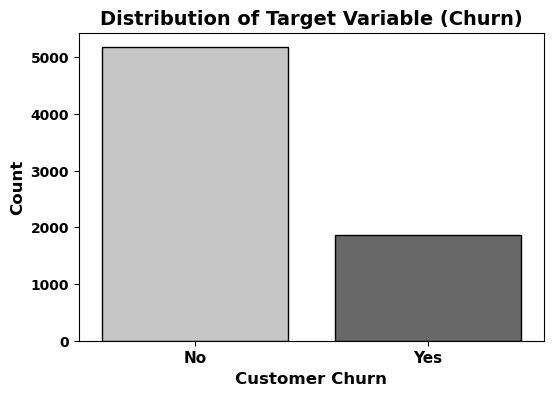

In [29]:
# Criar a gráfico
plt.figure(figsize=(6, 4))

# Criar gráfico de barras com Seaborn 
sns.barplot(x=target_counts.index, y=target_counts.values, palette="Greys", edgecolor="black",hue=target_counts.index)

# Definir rótulos e título
plt.xlabel("Customer Churn", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Target Variable (Churn)", fontsize=14, fontweight="bold")

# Melhorar a legibilidade dos rótulos do eixo X
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], fontsize=11)

# Exibir o gráfico
plt.show()

O facto das classes target estarem desbalanceadas, é um indicador a ter cuidado na escolha das métricas de avaliação dos modelos de previsão.

In [48]:
collumns_to_drop = ['customerID','TotalCharges']

In [51]:
# Selecionar colunas categóricas
categorical_cols = data.select_dtypes(include=["object"]).columns

categorical_cols = [col for col in categorical_cols if col not in collumns_to_drop]

In [60]:
# Contar valores únicos para cada variável categórica
unique_values_counts = {col: data[col].nunique() for col in categorical_cols}

# Criar DataFrame para exibição
categorical_df = pd.DataFrame(list(unique_values_counts.items()), columns=["Categorical Feature", "Unique Values"])

categorical_df 

,Categorical Feature,Unique Values
0,gender,2
1,Partner,2
2,Dependents,2
3,PhoneService,2
4,MultipleLines,3
5,InternetService,3
6,OnlineSecurity,3
7,OnlineBackup,3
8,DeviceProtection,3
9,TechSupport,3


In [53]:
# Criar um dicionário com os valores únicos de cada variável categórica
unique_values_dict = {col: data[col].unique().tolist() for col in categorical_cols}

# Criar um DataFrame com os valores apurados em cima
unique_cat_values_df = pd.DataFrame([(col, val) for col, values in unique_values_dict.items() for val in values],
                                columns=["Feature", "Unique Values"])

unique_cat_values_df

,Feature,Unique Values
0,gender,Female
1,gender,Male
2,Partner,Yes
3,Partner,No
4,Dependents,No
5,Dependents,Yes
6,PhoneService,No
7,PhoneService,Yes
8,MultipleLines,No phone service
9,MultipleLines,No


In [59]:
df_categorical_preprocessed = data.select_dtypes(include=["object"]).copy()
df_categorical_preprocessed = df_categorical_preprocessed.drop(columns=collumns_to_drop)
df_categorical_preprocessed

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [ ]:
def preprocess_binary_col_num(df, col):
    """
    Função para transformar variaveis booleanas em numericas

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo a coluna a ser transformada.
    - col (str): Nome da coluna a ser transformada.

    Retorna:
    - pd.DataFrame: DataFrame transformado e valores categóricos convertidos em numéricos.
    """

    if col in df.columns:

        # Converter valores categóricos em numéricos
        df[col] = df[col].map({'Yes': 1, 'No': 0}).astype(int)

    return df

In [ ]:
# Inicializar o OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
columns_ohe = ["marital","poutcome"]

# Ajustar o encoder e transformar os dados
one_hot_encoded = ohe.fit_transform(df_transformed[columns_ohe])
one_hot_columns = ohe.get_feature_names_out(columns_ohe)  # Corrigido

# Criar um DataFrame com os resultados do OHE
ohe_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns, index=df_transformed.index)

# Concatenar o resultado ao DataFrame original
df_transformed = pd.concat([df_transformed, ohe_df], axis=1)

# Remover a coluna original
df_transformed.drop(columns=columns_ohe, inplace=True)

# Exibir 15 linhas aleatórias do DataFrame atualizado para verificar o resultado
df_transformed.sample(15)